<center>
<h4>Diplomatura en CDAAyA 2018 - FaMAF - UNC</h4>
<h2>Análisis y Visualización de Datos</h2>
<h1>Laboratorio 2 - Vida Urbana Versus Vida Rural</h1>
<h1>Análisis de resultados</h1>
</center>

![title](drink.jpg)

### Importación Librerias

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import statistics
import scipy as sp

### Importación Archivos y previsualización

A continuación, importamos el dataset y el significado de cada variable, de acuerdo a la encuesta:

In [131]:
ds = pd.read_csv('responses.csv' ,encoding='utf8');
print("La estructura de la matriz de datos es: {}".format(ds.shape))
ds.head()

La estructura de la matriz de datos es: (1010, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [132]:
ds_cols = pd.read_csv('columns.csv' ,encoding='utf8');
ds_cols.head()

,"original,""short"";;;;"
0,"I enjoy listening to music.,""Music"";;;;"
1,"I prefer.,""Slow songs or fast songs"";;;;"
2,"Dance, Disco, Funk,""Dance"";;;;"
3,"Folk music,""Folk"";;;;"
4,"Country,""Country"";;;;"


### Análisis de Consumo de Alcohol por Género por Edad y Género

Para analizar el consumo de alcohol por género, obtenemos las frecuencias condicionales según el género:

In [133]:
fdp_gender_alcohol = ds.groupby('Gender')['Alcohol'].value_counts(normalize=True)
fdp_gender_alcohol.sort_index(0)

Gender  Alcohol       
female  drink a lot       0.176271
        never             0.115254
        social drinker    0.708475
male    drink a lot       0.286064
        never             0.134474
        social drinker    0.579462
Name: Alcohol, dtype: float64

In [134]:
fdp_gen_alc_df = pd.DataFrame(fdp_gender_alcohol)
fdp_gen_alc_df = fdp_gen_alc_df.rename(columns={'Alcohol': 'Prob_value'})
fdp_gen_alc_df = fdp_gen_alc_df.reset_index()
fdp_gen_alc_df

,Gender,Alcohol,Prob_value
0,female,social drinker,0.708475
1,female,drink a lot,0.176271
2,female,never,0.115254
3,male,social drinker,0.579462
4,male,drink a lot,0.286064
5,male,never,0.134474


In [135]:
new_index2 = ['never', 'social drinker', 'drink a lot']
fdp_gen_alc = fdp_gen_alc_df.set_index(['Gender','Alcohol'])
fdp_gen_alc = fdp_gen_alc.reindex(new_index2, level=1)
fdp_gen_alc = fdp_gen_alc.reset_index()
fdp_gen_alc

,Gender,Alcohol,Prob_value
0,female,never,0.115254
1,female,social drinker,0.708475
2,female,drink a lot,0.176271
3,male,never,0.134474
4,male,social drinker,0.579462
5,male,drink a lot,0.286064


In [136]:
fdp_gen_alc_piv = fdp_gen_alc.pivot(index = 'Gender', columns = 'Alcohol', values = 'Prob_value')
fdp_gen_alc_piv = fdp_gen_alc_piv[['never','social drinker','drink a lot']]
fdp_gen_alc_piv

Alcohol,never,social drinker,drink a lot
Gender,,,
female,0.115254,0.708475,0.176271
male,0.134474,0.579462,0.286064


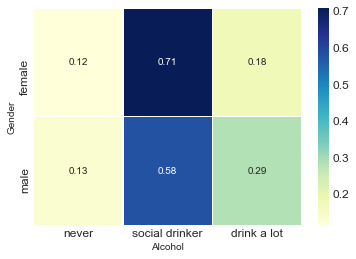

In [137]:
sns.heatmap(fdp_gen_alc_piv, linewidth=0.5,cmap="YlGnBu", annot=True)

# Analisis de correlación de variables seleccionadas

In [140]:
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [141]:
def do_ploting(x, y, figsize):
    fig, ax = plt.subplots(figsize= figsize)
    ax.set_title("Coeficiente de Correlación de Consumo de Alcohol con Variables Ordinales")
    sns.barplot(x=x, y=y,  ax = ax,palette="RdBu_r")
    ax.set_xlabel("Coeficiente")
    ax.set_ylabel("Variable")
    ax.axes.title.set_size(15)
    ax.yaxis.label.set_size(15)
    ax.xaxis.label.set_size(15)

def correlation_plot(var_of_interest, df_main, mapping, figsize = (10,10)):
    def calc_corr(var_of_interest, df, cols, figsize):
        lbls = []
        vals = []
        for col in cols:
            lbls.append(col)
            vals.append(np.corrcoef(df[col], df[var_of_interest])[0,1])
        corrs = pd.DataFrame({'features': lbls, 'coeficiente_de_correlación': vals})
        corrs = corrs.sort_values(by='coeficiente_de_correlación')
        do_ploting(corrs.coeficiente_de_correlación, corrs['features'], figsize)
        return corrs
    #imputing the set
    df = copy.deepcopy(df_main)
    df.replace(mapping, inplace = True)
    mean_values = df.mean(axis=0)
    df.fillna(mean_values, inplace=True)
    
    #correlating non-categorical varibales
    cols_floats = [col for col in df.columns if df[col].dtype!='object']
    cols_floats.remove(var_of_interest)
    corrs_one = calc_corr(var_of_interest, df, cols_floats, figsize)
    
    #correlating categorical variables
    cols_cats = [col for col in df.columns if df[col].dtype=='object']
    if cols_cats:
        df_dummies = pd.get_dummies(df[cols_cats])
        cols_cats = df_dummies.columns
        df_dummies[var_of_interest] = df[var_of_interest]
        corrs_two = calc_corr(var_of_interest, df_dummies, cols_cats, (5,10))
    else:
        corrs_two = 0
    return [corrs_one, corrs_two]

C:\Users\lprone\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


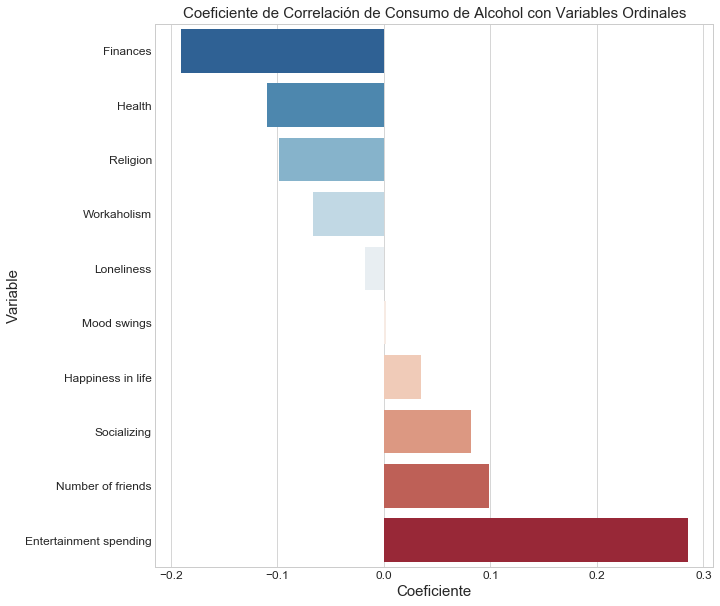

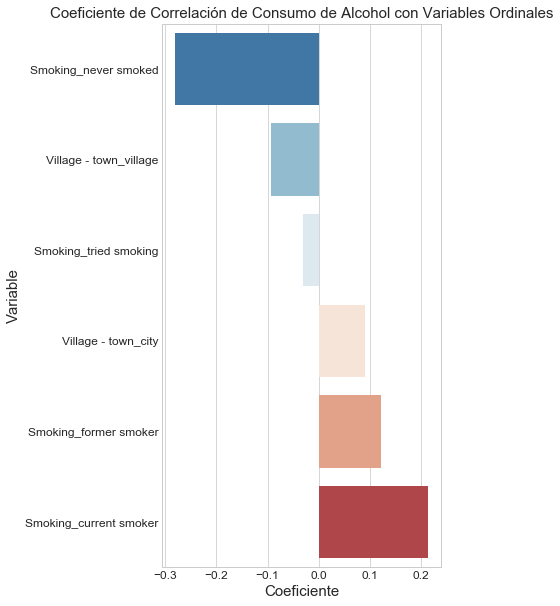

In [142]:
#young = ds[['Alcohol','Socializing','Weight','Age','Smoking','Healthy eating','Workaholism','Health','Happiness in life',
#                       'Finances','Gender','Village - town','Number of friends']]
young = ds[['Alcohol','Village - town','Smoking','Finances','Health','Religion','Loneliness','Mood swings','Workaholism','Socializing','Number of friends','Happiness in life','Entertainment spending']]
var_of_interest = 'Alcohol'
mapping = {var_of_interest: {'never':0,'social drinker':1,'drink a lot':2}}
young.dropna(subset=[var_of_interest], inplace=True)

import copy
corrs_area = correlation_plot(var_of_interest, young, mapping)

# Analisis de correlación por variable

In [143]:
new_index2 = ['never', 'social drinker', 'drink a lot']

## Gender

In [144]:
varToAnalize = "Gender"
new_index1 = ['female', 'male']

join_var_alcohol = (pd.get_dummies(ds["Alcohol"])).join(pd.get_dummies(ds[varToAnalize]))
corr_var_alcohol = join_var_alcohol.corr()
corr_var_alcohol.drop(columns=set(ds[varToAnalize].dropna()),inplace=True)
corr_var_alcohol.drop(index=set(ds["Alcohol"].dropna()),inplace=True)
corr_var_alcohol.reindex(index=new_index1, columns=new_index)

,never,social drinker,drink a lot
female,-0.029437,0.131263,-0.127922
male,0.027885,-0.131914,0.129757


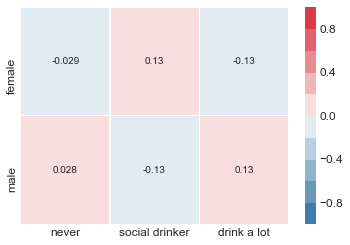

In [145]:
sns.heatmap(corr_var_alcohol.reindex(new_index1).transpose().reindex(new_index2).transpose(), linewidth=0.5,cmap=sns.diverging_palette(240, 10, n=10), annot=True, vmin = -1, vmax= 1)

## Village Town

In [146]:
varToAnalize = "Village - town"
new_index1 = ['city', 'village']

join_var_alcohol = (pd.get_dummies(ds["Alcohol"])).join(pd.get_dummies(ds[varToAnalize]))
corr_var_alcohol = join_var_alcohol.corr()
corr_var_alcohol.drop(columns=set(ds[varToAnalize].dropna()),inplace=True)
corr_var_alcohol.drop(index=set(ds["Alcohol"].dropna()),inplace=True)
corr_var_alcohol.reindex(index=new_index1, columns=new_index)

,never,social drinker,drink a lot
city,-0.044768,-0.046734,0.091826
village,0.048185,0.045136,-0.092810


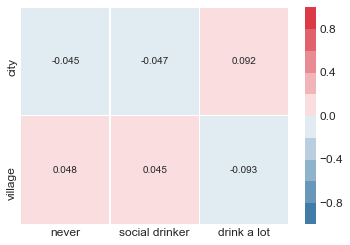

In [147]:
sns.heatmap(corr_var_alcohol.reindex(new_index1).transpose().reindex(new_index2).transpose(), linewidth=0.5,cmap=sns.diverging_palette(240, 10, n=10), annot=True, vmin = -1, vmax= 1)

In [148]:

varToAnalize = "Village - town"
new_index1 = ['city','village']

join_var_alcohol = (pd.get_dummies(ds["Alcohol"])).join(pd.get_dummies(ds[varToAnalize]))
corr_var_alcohol = join_var_alcohol.corr()
corr_var_alcohol.drop(columns=set(ds[varToAnalize].dropna()),inplace=True)
corr_var_alcohol.drop(index=set(ds["Alcohol"].dropna()),inplace=True)
corr_var_alcohol.reindex(index=new_index1, columns=new_index)

,never,social drinker,drink a lot
city,-0.044768,-0.046734,0.091826
village,0.048185,0.045136,-0.092810


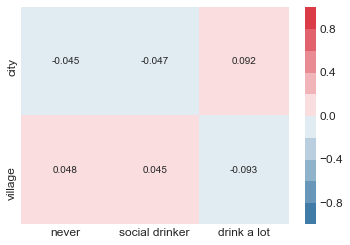

In [149]:
sns.heatmap(corr_var_alcohol.reindex(new_index1).transpose().reindex(new_index2).transpose(),cmap=sns.diverging_palette(240, 10, n=10), annot=True, vmin = -1, vmax= 1)

## Smoking

In [150]:

varToAnalize = "Smoking"
new_index1 = ['never smoked','tried smoking','former smoker','current smoker']

join_var_alcohol = (pd.get_dummies(ds["Alcohol"])).join(pd.get_dummies(ds[varToAnalize]))
corr_var_alcohol=corr_var_alcohol.reindex(new_index1)
corr_var_alcohol = join_var_alcohol.corr()
corr_var_alcohol.drop(columns=set(ds[varToAnalize].dropna()),inplace=True)
corr_var_alcohol.drop(index=set(ds["Alcohol"].dropna()),inplace=True)
corr_var_alcohol.reindex(index=new_index1, columns=new_index)

,never,social drinker,drink a lot
never smoked,0.264579,-0.024242,-0.181622
tried smoking,-0.084154,0.161626,-0.108869
former smoker,-0.083581,-0.028475,0.104451
current smoker,-0.094404,-0.129642,0.223494


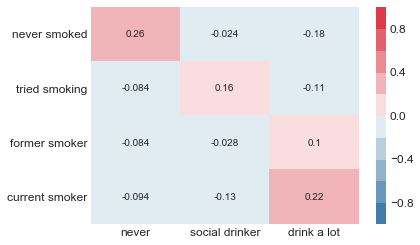

In [151]:
sns.heatmap(corr_var_alcohol.reindex(new_index1).transpose().reindex(new_index2).transpose(),cmap=sns.diverging_palette(240, 10, n=10), annot=True, vmin = -1, vmax= 1)

## Finances

In [198]:
varToAnalize = "Finances"

cross_var_alcohol = pd.crosstab(index=ds.Alcohol,columns=ds[varToAnalize], normalize=True, margins=False)
cross_var_alcohol.reindex(index=new_index)

Finances,1.0,2.0,3.0,4.0,5.0
Alcohol,,,,,
never,0.006986,0.020958,0.043912,0.030938,0.019960
social drinker,0.060878,0.097804,0.263473,0.169661,0.063872
drink a lot,0.054890,0.054890,0.048902,0.048902,0.013972


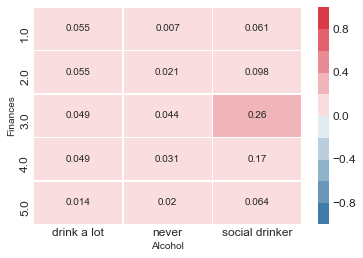

In [199]:
sns.heatmap(cross_var_alcohol.transpose(), linewidth=0.5,cmap=sns.diverging_palette(240, 10, n=10), annot=True, vmin = -1, vmax= 1)

## Health

In [154]:
varToAnalize = "Health"

cross_var_alcohol = pd.crosstab(index=ds.Alcohol,columns=ds[varToAnalize], normalize=True, margins=False)
cross_var_alcohol.reindex(new_index)

Health,1.0,2.0,3.0,4.0,5.0
Alcohol,,,,,
never,0.005976,0.018924,0.039841,0.034861,0.023904
social drinker,0.036853,0.086653,0.260956,0.188247,0.082669
drink a lot,0.029880,0.026892,0.096614,0.040837,0.026892


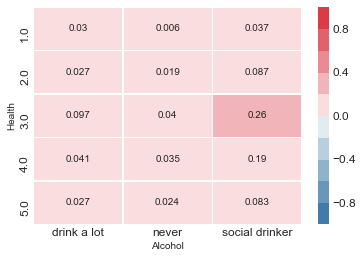

In [155]:
sns.heatmap(cross_var_alcohol.transpose(), linewidth=0.5,cmap=sns.diverging_palette(240, 10, n=10), annot=True, vmin = -1, vmax= 1)

## Religion

In [156]:
varToAnalize = "Religion"

cross_var_alcohol = pd.crosstab(index=ds.Alcohol,columns=ds[varToAnalize], normalize=True, margins=False)
cross_var_alcohol.reindex(new_index)

Religion,1.0,2.0,3.0,4.0,5.0
Alcohol,,,,,
never,0.039920,0.024950,0.026946,0.016966,0.013972
social drinker,0.252495,0.148703,0.124750,0.069860,0.060878
drink a lot,0.107784,0.035928,0.044910,0.018962,0.012974


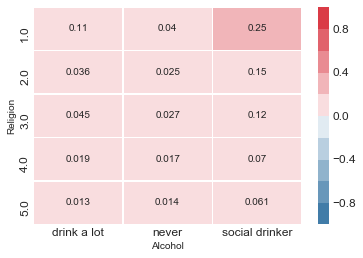

In [157]:
sns.heatmap(cross_var_alcohol.transpose(), linewidth=0.5,cmap=sns.diverging_palette(240, 10, n=10), annot=True, vmin = -1, vmax= 1)

## Loneliness

In [158]:
varToAnalize = "Loneliness"

cross_var_alcohol = pd.crosstab(index=ds.Alcohol,columns=ds[varToAnalize], normalize=True, margins=False)
cross_var_alcohol.reindex(new_index)

Loneliness,1.0,2.0,3.0,4.0,5.0
Alcohol,,,,,
never,0.010956,0.035857,0.045817,0.015936,0.013944
social drinker,0.071713,0.162351,0.242032,0.117530,0.062749
drink a lot,0.028884,0.065737,0.066733,0.032869,0.026892


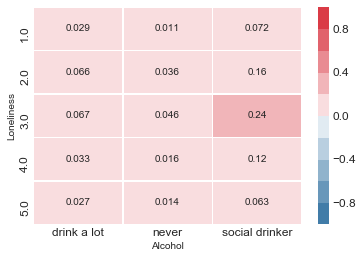

In [159]:
sns.heatmap(cross_var_alcohol.transpose(), linewidth=0.5,cmap=sns.diverging_palette(240, 10, n=10), annot=True, vmin = -1, vmax= 1)

## Mood Swings

In [160]:
varToAnalize = "Mood swings"

cross_var_alcohol = pd.crosstab(index=ds.Alcohol,columns=ds[varToAnalize], normalize=True, margins=False)
cross_var_alcohol.reindex(new_index)

Mood swings,1.0,2.0,3.0,4.0,5.0
Alcohol,,,,,
never,0.004995,0.012987,0.060939,0.027972,0.016983
social drinker,0.019980,0.149850,0.236763,0.149850,0.097902
drink a lot,0.006993,0.043956,0.078921,0.059940,0.031968


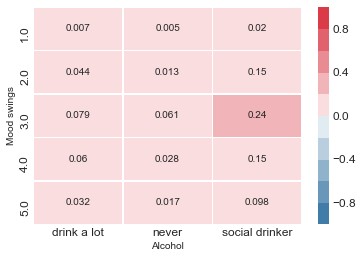

In [161]:
sns.heatmap(cross_var_alcohol.transpose(), linewidth=0.5,cmap=sns.diverging_palette(240, 10, n=10), annot=True, vmin = -1, vmax= 1)

## Workaholism

In [162]:
varToAnalize = "Workaholism"

cross_var_alcohol = pd.crosstab(index=ds.Alcohol,columns=ds[varToAnalize], normalize=True, margins=False)
cross_var_alcohol.reindex(new_index)

Workaholism,1.0,2.0,3.0,4.0,5.0
Alcohol,,,,,
never,0.013,0.025,0.043,0.020,0.022
social drinker,0.084,0.148,0.196,0.123,0.106
drink a lot,0.048,0.048,0.052,0.037,0.035


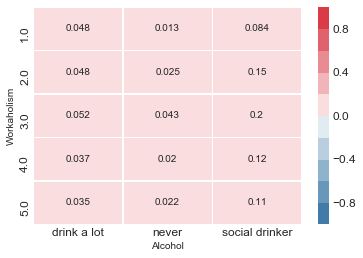

In [163]:
sns.heatmap(cross_var_alcohol.transpose(), linewidth=0.5,cmap=sns.diverging_palette(240, 10, n=10), annot=True, vmin = -1, vmax= 1)

## Socializing

In [164]:
varToAnalize = "Socializing"

cross_var_alcohol = pd.crosstab(index=ds.Alcohol,columns=ds[varToAnalize], normalize=True, margins=False)
cross_var_alcohol.reindex(new_index)

Socializing,1.0,2.0,3.0,4.0,5.0
Alcohol,,,,,
never,0.014,0.020,0.053,0.026,0.010
social drinker,0.047,0.120,0.259,0.150,0.079
drink a lot,0.012,0.043,0.073,0.056,0.038


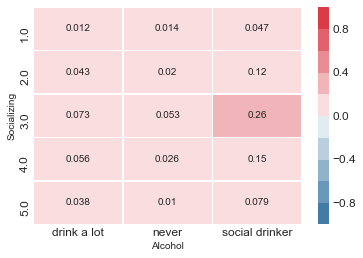

In [165]:
sns.heatmap(cross_var_alcohol.transpose(), linewidth=0.5,cmap=sns.diverging_palette(240, 10, n=10), annot=True, vmin = -1, vmax= 1)

## Number of friends

In [166]:
varToAnalize = "Number of friends"

cross_var_alcohol = pd.crosstab(index=ds.Alcohol,columns=ds[varToAnalize], normalize=True, margins=False)
cross_var_alcohol.reindex(new_index)

Number of friends,1,2,3,4,5
Alcohol,,,,,
never,0.008955,0.014925,0.051741,0.031841,0.015920
social drinker,0.037811,0.083582,0.283582,0.154229,0.096517
drink a lot,0.003980,0.026866,0.086567,0.047761,0.055721


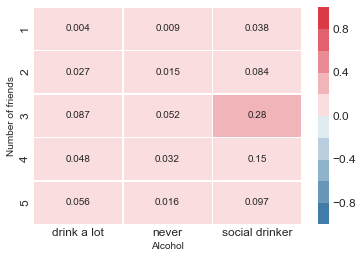

In [167]:
sns.heatmap(cross_var_alcohol.transpose(), linewidth=0.5,cmap=sns.diverging_palette(240, 10, n=10), annot=True, vmin = -1, vmax= 1)

## Happiness in life

In [168]:
varToAnalize = "Happiness in life"

cross_var_alcohol = pd.crosstab(index=ds.Alcohol,columns=ds[varToAnalize], normalize=True, margins=False)
cross_var_alcohol.reindex(new_index)

Happiness in life,1.0,2.0,3.0,4.0,5.0
Alcohol,,,,,
never,0.000999,0.004995,0.039960,0.058941,0.018981
social drinker,0.006993,0.041958,0.191808,0.332667,0.081918
drink a lot,0.003996,0.011988,0.049950,0.114885,0.039960


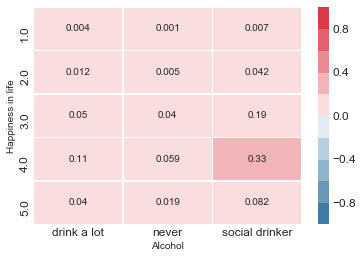

In [169]:
sns.heatmap(cross_var_alcohol.transpose(), linewidth=0.5,cmap=sns.diverging_palette(240, 10, n=10), annot=True, vmin = -1, vmax= 1)

## Entertainment spending

In [191]:
varToAnalize = "Entertainment spending"

cross_var_alcohol = pd.crosstab(index=ds.Alcohol,columns=ds[varToAnalize], normalize=True, margins=False)
cross_var_alcohol.reindex(new_index)

Entertainment spending,1.0,2.0,3.0,4.0,5.0
Alcohol,,,,,
never,0.017964,0.026946,0.046906,0.023952,0.007984
social drinker,0.067864,0.143713,0.217565,0.142715,0.083832
drink a lot,0.002994,0.021956,0.046906,0.076846,0.071856


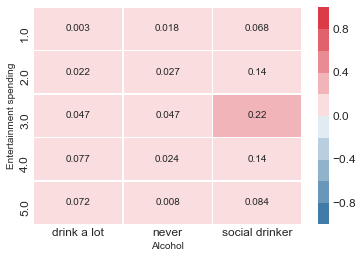

In [192]:
sns.heatmap(cross_var_alcohol.transpose(), linewidth=0.5,cmap=sns.diverging_palette(240, 10, n=10), annot=True, vmin = -1, vmax= 1)

# Test Chi cuadrado para variables con mayor indice de correlacion

## Finances

In [184]:
dep_place_finances = pd.crosstab(index = ds['Finances'], columns=ds.Alcohol, normalize=True, margins=False)
chi2, p_value, dof, ex = sp.stats.chi2_contingency(dep_place_finances)
alpha = 0.01
print('p = {}'.format(p_value))
if 1 - p_value > alpha:
    print("La hipótesis nula puede ser rechazada. Hay dependencia entre las variables")
else:
    print("La hipótesis nula no puede ser rechazada. No se rechaza la independencia entre las variables.")

p = 1.0
La hipótesis nula no puede ser rechazada. No se rechaza la independencia entre las variables.


## Entertainment spending

In [185]:
dep_place_entertainment = pd.crosstab(index = ds['Entertainment spending'], columns=ds.Alcohol, normalize=True, margins=False)
chi2, p_value, dof, ex = sp.stats.chi2_contingency(dep_place_entertainment)
alpha = 0.01
print('p = {}'.format(p_value))
if 1 - p_value > alpha:
    print("La hipótesis nula puede ser rechazada. Hay dependencia entre las variables")
else:
    print("La hipótesis nula no puede ser rechazada. No se rechaza la independencia entre las variables.")

p = 0.999999714085605
La hipótesis nula no puede ser rechazada. No se rechaza la independencia entre las variables.


## Smoking

In [187]:
dep_place_smoking = pd.crosstab(index = ds['Smoking'], columns=ds.Alcohol, normalize=True, margins=False)
chi2, p_value, dof, ex = sp.stats.chi2_contingency(dep_place_smoking)
alpha = 0.01
print('p = {}'.format(p_value))
if 1 - p_value > alpha:
    print("La hipótesis nula puede ser rechazada. Hay dependencia entre las variables")
else:
    print("La hipótesis nula no puede ser rechazada. No se rechaza la independencia entre las variables.")

p = 0.9999448955822006
La hipótesis nula no puede ser rechazada. No se rechaza la independencia entre las variables.


# Consumo de alcohol por genero y edad

In [174]:
fdp_age_alcohol = ds.groupby('Age')['Alcohol'].value_counts(normalize=True)
fdp_age_alcohol.sort_index(0)

Age   Alcohol       
15.0  drink a lot       0.090909
      never             0.545455
      social drinker    0.363636
16.0  drink a lot       0.034483
      never             0.448276
      social drinker    0.517241
17.0  drink a lot       0.226415
      never             0.188679
      social drinker    0.584906
18.0  drink a lot       0.198347
      never             0.049587
      social drinker    0.752066
19.0  drink a lot       0.267943
      never             0.095694
      social drinker    0.636364
20.0  drink a lot       0.170984
      never             0.077720
      social drinker    0.751295
21.0  drink a lot       0.244094
      never             0.118110
      social drinker    0.637795
22.0  drink a lot       0.238095
      never             0.130952
      social drinker    0.630952
23.0  drink a lot       0.260870
      never             0.108696
      social drinker    0.630435
24.0  drink a lot       0.214286
      never             0.214286
      social drinker  

In [175]:
fdp_age_alc_df = pd.DataFrame(fdp_age_alcohol)
fdp_age_alc_df = fdp_age_alc_df.rename(columns={'Alcohol': 'Prob_value'})
fdp_age_alc_df = fdp_age_alc_df.reset_index()
fdp_age_alc_df

,Age,Alcohol,Prob_value
0,15.0,never,0.545455
1,15.0,social drinker,0.363636
2,15.0,drink a lot,0.090909
3,16.0,social drinker,0.517241
4,16.0,never,0.448276
5,16.0,drink a lot,0.034483
6,17.0,social drinker,0.584906
7,17.0,drink a lot,0.226415
8,17.0,never,0.188679
9,18.0,social drinker,0.752066


In [176]:
fdp_age_alc_piv = fdp_age_alc_df.pivot(index = 'Age', columns = 'Alcohol', values = 'Prob_value')
fdp_age_alc_piv = fdp_age_alc_piv[['never','social drinker','drink a lot']]
fdp_age_alc_piv

Alcohol,never,social drinker,drink a lot
Age,,,
15.0,0.545455,0.363636,0.090909
16.0,0.448276,0.517241,0.034483
17.0,0.188679,0.584906,0.226415
18.0,0.049587,0.752066,0.198347
19.0,0.095694,0.636364,0.267943
20.0,0.077720,0.751295,0.170984
21.0,0.118110,0.637795,0.244094
22.0,0.130952,0.630952,0.238095
23.0,0.108696,0.630435,0.260870


In [178]:
fdp_age_alc_piv2 = fdp_age_alc_df.pivot(index = 'Alcohol', columns = 'Age', values = 'Prob_value').reindex(new_index2)
fdp_age_alc_piv2

Age,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Alcohol,,,,,,,,,,,,,,,,
never,0.545455,0.448276,0.188679,0.049587,0.095694,0.077720,0.118110,0.130952,0.108696,0.214286,0.066667,0.266667,0.142857,0.058824,0.090909,0.4
social drinker,0.363636,0.517241,0.584906,0.752066,0.636364,0.751295,0.637795,0.630952,0.630435,0.571429,0.600000,0.533333,0.714286,0.705882,0.636364,0.2
drink a lot,0.090909,0.034483,0.226415,0.198347,0.267943,0.170984,0.244094,0.238095,0.260870,0.214286,0.333333,0.200000,0.142857,0.235294,0.272727,0.4


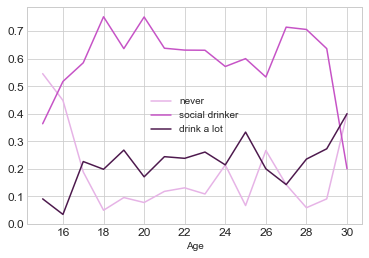

In [190]:
plt.plot(fdp_age_alc_piv2.axes[1],fdp_age_alc_piv2.values[0], '#e6b3e6')
plt.plot(fdp_age_alc_piv2.axes[1],fdp_age_alc_piv2.values[1], '#c653c6')
plt.plot(fdp_age_alc_piv2.axes[1],fdp_age_alc_piv2.values[2], '#4d194d')

plt.legend(fdp_age_alc_piv2.axes[0])

plt.xlabel('Age') 
plt.show()